In [307]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

In [308]:
x, y = make_circles(n_samples = 100, noise = 0.2, factor = 0.3, random_state = 9)
y = y.reshape(1, y.shape[0])
print("x_shape = ",x.shape, "y_shape = ",y.shape)

x_shape =  (100, 2) y_shape =  (1, 100)


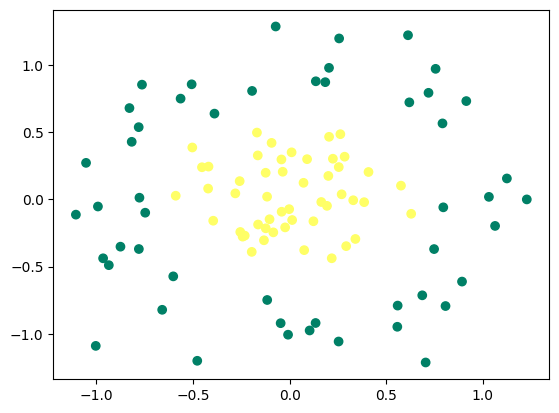

In [309]:
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = 'summer')
plt.show()

In [310]:
# redimensionnement de x
X = x.T

In [311]:
def initialisation(n0, n1, n2, n3):
    w1 = np.random.randn(n1, n0)
    b1 = np.random.randn(n1, 1)
    w2 = np.random.randn(n2, n1)
    b2 = np.random.randn(n2, 1)
    w3 = np.random.randn(n3, n2)
    b3 = np.random.randn(n3, 1)

    parametres = {
        'w1': w1,
        'b1': b1,
        'w2': w2,
        'b2': b2,
        'w3': w3,
        'b3': b3
    }

    return parametres

In [312]:
def forward_propagation(X, parametres):

    w3 = parametres['w3']
    b3 = parametres['b3']
    
    w2 = parametres['w2']
    b2 = parametres['b2']

    w1 = parametres['w1']
    b1 = parametres['b1']

    z1 = w1.dot(X) + b1
    A1 = 1 / (1 + np.exp(-z1))

    z2 = w2.dot(A1) + b2
    A2 = 1 / (1 + np.exp(-z2))

    z3 = w3.dot(A2) + b3
    A3 = 1 / (1 + np.exp(-z3))

    activations = {
        'A1': A1,
        'A2': A2,
        'A3': A3
    }

    return activations

In [313]:
#def log_loss(y, activations):
    #activations = forward_propagation(X, parametres)
    #A3 = activations['A3']
    #m = y.shape[1]
    #return 1 / m * np.sum( - y * np.log(A3) - (1 - y) * np.log(1 - A3))

In [314]:
def back_propagation(X, parametres, activations):

    m = y.shape[1]
    w3 = parametres['w3']
    w2 = parametres['w2']

    A1 = activations['A1']
    A2 = activations['A2']
    A3 = activations['A3']
   
    dz3 = A3 - y
    dw3 = (1 / m ) * dz3.dot(A2.T)
    db3 = (1 / m ) * np.sum(dz3, axis = 1, keepdims = True)

    dz2 = np.dot(w3.T, dz3) * A2*(1 - A2)
    dw2 = (1 / m ) * dz2.dot(A1.T)
    db2 = (1 / m ) * np.sum(dz2, axis = 1, keepdims = True)

    dz1 = np.dot(w2.T, dz2) * A1*(1 - A1) 
    dw1 = (1 / m ) *dz1.dot(X.T)
    db1 = (1 / m ) *np.sum(dz1, axis = 1, keepdims = True)

    gradients = {
        'dw3': dw3,
        'db3': db3,
        'dw2': dw2,
        'db2': db2,
        'dw1': dw1,
        'db1': db1
    }

    return gradients

In [315]:
def update(parametres, gradients, learning_rate):

    w3 = parametres['w3']
    b3 = parametres['b3']
    w2 = parametres['w2']
    b2 = parametres['b2']
    w1 = parametres['w1']
    b1 = parametres['b1']

    dw3 = gradients['dw3']
    db3 = gradients['db3']
    dw2 = gradients['dw2']
    db2 = gradients['db2']
    dw1 = gradients['dw1']
    db1 = gradients['db1']

    w3 = w3 - learning_rate * dw3
    b3 = b3 - learning_rate * db3
    w2 = w2 - learning_rate * dw2
    b2 = b2 - learning_rate * db2
    w1 = w1 - learning_rate * dw1
    b1 = b1 - learning_rate * db1

    parametres = {
        'w1': w1,
        'b1': b1,
        'w2': w2,
        'b2': b2,
        'w3': w3,
        'b3': b3
    }

    return parametres

In [316]:
def prediction(X, parametres):
    activations = forward_propagation(X, parametres)
    A3 = activations['A3']
    return A3 >= 0.5
    

In [317]:
from sklearn.metrics import log_loss, accuracy_score
from tqdm import tqdm

In [318]:
def neural_network(X, y, n1, n2, learning_rate, n_iter):
    n0 = X.shape[0]
    n3 = y.shape[0]
    parametres = initialisation(n0, n1, n2, n3)

    loss = []
    accuracy = []
    
    for i in tqdm(range(n_iter)):
        activations = forward_propagation(X, parametres)
        gradients = back_propagation(X, parametres, activations)
        parametres = update(parametres, gradients, learning_rate)
        if i % 10 == 0 :
            loss.append(log_loss(y, activations['A3']))
            y_pred = prediction(X, parametres)
            curent_accuracy = accuracy_score(y.flatten(), y_pred.flatten())
            accuracy.append(curent_accuracy)

    plt.figure(figsize = (14, 4))
    
    plt.subplot(1, 2, 1)
    plt.plot(loss, label = 'train_loss')
    plt.show()
    plt.subplot(1, 2, 2)
    plt.plot(accuracy, label = 'train_accuracy')
    plt.show()


    return parametres
        

  0%|                                                                                                                                                         | 0/1000 [00:00<?, ?it/s]/home/dieze/mon_envJUPYTER/lib/python3.13/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/dieze/mon_envJUPYTER/lib/python3.13/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/dieze/mon_envJUPYTER/lib/python3.13/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/dieze/mon_envJUPYTER/lib/python3.13/site-packages/sklearn/metrics/_classification.py:259: UserWarning: The y_prob values do not sum to one. Make sure to pass probabilities.
  warnings.warn(
/home/dieze/mon_envJUPYTER/lib/py

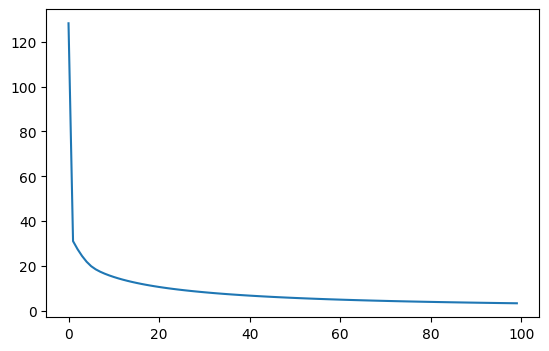

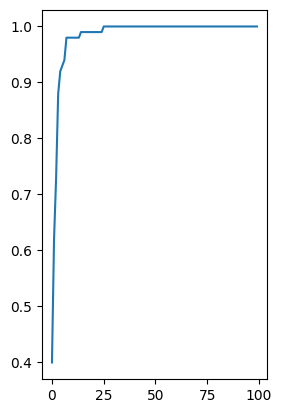

In [321]:
parametres = neural_network(X, y, n1 = 64, n2 = 64, learning_rate = 0.1, n_iter = 1000)

In [322]:
parametres

{'w1': array([[-0.77697174, -0.10407408],
        [-0.65465803,  0.21669117],
        [ 0.34820529,  1.1992357 ],
        [-0.82379708, -0.19061069],
        [-0.78783284, -0.36094718],
        [-0.82882614,  0.81993545],
        [ 2.0927227 , -0.82612383],
        [-1.08716894, -1.93638195],
        [-0.04131682,  0.27837269],
        [ 0.48825657,  0.2893609 ],
        [ 0.6426704 ,  1.42268427],
        [-0.36572776, -0.44771226],
        [ 1.13353271,  1.33867375],
        [-0.87613105,  0.70946651],
        [ 1.0897132 ,  1.49583516],
        [-0.83870212,  0.15785998],
        [-0.79515918, -1.57457618],
        [-0.25029936,  0.77367053],
        [ 2.74218024,  2.02426475],
        [ 0.99015464,  1.17101882],
        [ 0.43729923, -0.87768638],
        [ 0.04716944,  0.93231772],
        [-1.34738741, -1.512273  ],
        [ 1.09729517, -1.43424226],
        [-0.83174596,  1.08575138],
        [-0.4741601 , -0.12296986],
        [ 1.01528988,  0.06354502],
        [ 0.38003507, 

In [ ]:
from 